#                              Machine Leaning (Spring 2023) 
##                                           Hands-on 2 - Classification

### <font color=darkBlue>1) Bayes Optimal Classifier</font> ###

##### Bayes' Theorem is a fundamental principle in probability theory that enables us to update our beliefs about the likelihood of an event occurring in light of new evidence.

P(H|D) = (P(D|H) * P(H)) / P(D)

where P(H|D) is the posterior probability of the hypothesis given the observed data, P(D|H) is the probability of observing the data given the hypothesis, P(H) is the prior probability of the hypothesis (i.e., the probability of the hypothesis before any data is observed), and P(D) is the probability of observing the data, which acts as a normalization constant.

The key assumption made by the Naive Bayes classifier is that the effect of the value of a predictor (x) on a given class (c) is independent of the values of other predictors. This assumption is called class conditional independence. Class conditional independence means that the probability of a particular feature (x) given a particular class (c) is independent of the values of other features, given the class.

Python libraries offer three kinds of Naïve Bayes classifiers:

Gaussian: it assumes that features follow a normal distribution.

Multinomial: it is used for discrete counts.

Bernoulli: the binomial model is useful if your feature vectors are binary (i.e. zeros and ones).

##### Let's start with an example ...

In [1]:
'Step 1: Import libraries'

from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
' breast_cancer.data     : Names of the columns '
' breast_cancer.feature_names     : The names of the dataset columns '
' breast_cancer.target            : The variable of target classes '

    
breast_cancer     = datasets.load_breast_cancer()

breast_cancer_df           = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)  
breast_cancer_df['target'] = breast_cancer.target

data = breast_cancer

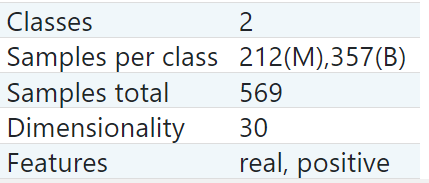

In [3]:
' breast_cancer.target_names      : The names of target classes '

breast_cancer.target_names  

array(['malignant', 'benign'], dtype='<U9')

In [4]:
' shape of data array ' 

breast_cancer.data.shape

(569, 30)

In [5]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
breast_cancer_df.sample(n = 5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
185,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,...,21.18,75.39,437.0,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697,1
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.000000,0.000000,0.1928,0.05975,...,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164,1
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.20740,0.17910,0.10700,0.3110,0.07592,1
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,0.05955,...,15.64,86.97,549.1,0.1385,0.12660,0.12420,0.09391,0.2827,0.06771,1
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,18.91,150.10,1610.0,0.1478,0.56340,0.37860,0.21020,0.3751,0.11080,0


In [7]:
' Now, we want to split our dataset into train and test sections '

from sklearn.model_selection import train_test_split

X = breast_cancer_df.drop('target', axis=1)
Y = breast_cancer_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=8)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier = GaussianNB()  

classifier.fit(X_train, Y_train)

GaussianNB()

In [9]:
Y_predict_train = classifier.predict(X_train)
Y_predict_test = classifier.predict(X_test)

print(f"Train Accuracy: {classifier.score(X_train, Y_train) * 100}")
print(f"Test Accuracy : {classifier.score(X_test, Y_test) * 100}")

Train Accuracy: 94.83568075117371
Test Accuracy : 93.7062937062937


When classes are not equally distributed, relying solely on accuracy as a metric may not be the most effective approach. Instead, it is better to assess the performance of a classifier using a confusion matrix, which provides a more detailed picture of the classification results. The confusion matrix helps to determine the number of times samples are classified correctly into their respective classes and the number of times they are classified into other classes. This provides a more comprehensive understanding of the classifier's performance, especially in cases where there is class imbalance.

For train data: 


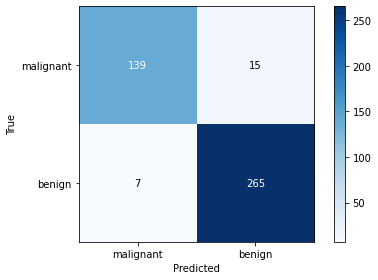


For test data: 


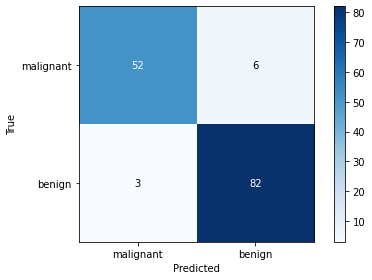

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_cm(Y_true, Y_pred):
    cm = confusion_matrix(Y_true, Y_pred)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    tick_marks = np.arange(len(data.target_names))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(data.target_names)
    ax.set_yticklabels(data.target_names)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

    # Add counts to each box
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.show()
    
    
print("For train data: ")
plot_cm(Y_train, Y_predict_train)
print()
print("For test data: ")
plot_cm(Y_test, Y_predict_test)

There are other metrics which are used in different situations, such as:

* Sensitivity (Recall)
* Precision
* F1-score

https://medium.com/analytics-vidhya/notes-on-sensitivity-specificity-precision-recall-and-f1-score-e34204d0bb9b

In [11]:
from sklearn.metrics import classification_report

print("Train Data: ")
print(classification_report(Y_train, Y_predict_train))
print("*********************************************************")
print("Test Data: ")
print(classification_report(Y_test, Y_predict_test))

Train Data: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       154
           1       0.95      0.97      0.96       272

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426

*********************************************************
Test Data: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.93      0.96      0.95        85

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In order to improve the reliability of our accuracy assessment, we can use a k-fold cross-validation approach instead of simply relying on a test section that only represents 1/k of the dataset. This is important because the test section may have biases that can skew the results. By using a k-fold cross-validation approach, we can split the data into k subsets, train the model on k-1 of them, and test it on the remaining subset, and repeat this process k times, each time with a different subset serving as the test set. This enables us to obtain a more rigorous and representative evaluation of the model's performance.

In [12]:
from sklearn.model_selection import cross_val_score

acc = cross_val_score(classifier, X, Y, cv=4, scoring='accuracy')

print("Our accuracy is between: %.2f%% and %.2f%%" %((np.mean(acc)*100 - np.std(acc)*100), (np.mean(acc)*100 + np.std(acc)*100)))

Our accuracy is between: 92.41% and 96.00%


#### Plot the decision boundary. 
For that, we will assign a color to each point in the mesh [x_min, x_max]*[y_min, y_max].__

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a 3-class dataset with 2 informative features and 1000 samples
a, b = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
                           n_classes=3, class_sep=2, random_state=42)

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=8)

In [14]:
clf = GaussianNB()  
clf.fit(a_train, b_train)

GaussianNB()

In [15]:
print(f"Test Accuracy: {clf.score(a_test, b_test) * 100}")

Test Accuracy: 99.5


In [16]:
from matplotlib.colors import ListedColormap

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['yellow', 'orange', 'skyblue'])
cmap_bold = ListedColormap(['red', 'black', 'blue'])

In [17]:
a_train_min, a_train_max = a_train[:, 0].min() - 1, a_train[:, 0].max() + 1
b_train_min, b_train_max = a_train[:, 1].min() - 1, a_train[:, 1].max() + 1

aa, bb = np.meshgrid(np.arange(a_train_min, a_train_max, h), np.arange(b_train_min, b_train_max, h))

Z = clf.predict(np.c_[aa.ravel(), bb.ravel()])

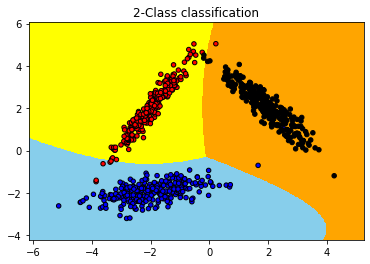

In [18]:
# Put the result into a color plot
Z = Z.reshape(aa.shape)
plt.figure()
plt.pcolormesh(aa, bb, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(a_train[:, 0], a_train[:, 1], c=b_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("2-Class classification")
plt.axis('tight')

plt.show()

### <font color=darkBlue>2) Naive bayes from scratch</font> ###

In [19]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import accuracy_score


class NaiveBayesClassifier:
    def __init__(self):
        self.class_prior = None
        self.class_likelihood = None
        self.class_labels = None

    def fit(self, X_train, y_train):
        self.class_labels = np.unique(y_train)
        n_samples, n_features = X_train.shape
        n_classes = len(self.class_labels)
        self.class_prior = np.zeros(n_classes)
        self.class_likelihood = np.zeros((n_classes, n_features, 2))

        for i, label in enumerate(self.class_labels):
            X_class = X_train[y_train == label]
            self.class_prior[i] = X_class.shape[0] / float(n_samples)
            self.class_likelihood[i,:,0] = np.mean(X_class, axis=0)
            self.class_likelihood[i,:,1] = np.var(X_class, axis=0)

    def predict(self, X_test):
        n_samples, n_features = X_test.shape
        predictions = np.zeros(n_samples)

        for i in range(n_samples):
            posteriors = []
            for j, label in enumerate(self.class_labels):
                prior = math.log(self.class_prior[j])
                likelihood = np.sum(np.log(self.cal_prob(X_test[i], self.class_likelihood[j,:,:])))
                posterior = prior + likelihood
                posteriors.append(posterior)
            predictions[i] = self.class_labels[np.argmax(posteriors)]

        return predictions

    def cal_prob(self, x, class_likelihood):
        mean = class_likelihood[:, 0]
        var = class_likelihood[:, 1]
        return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(x - mean)**2 / (2 * var))

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy


In [20]:
iris = datasets.load_iris()

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

nb = NaiveBayesClassifier()
nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy*100}")


Accuracy: 100.0


### <font color=darkBlue>3) MLE classifier from scratch</font> ###

In [21]:
class MLEClassifier:
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_vars = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.class_priors = []
        self.class_means = []
        self.class_vars = []

        for c in np.unique(y):
            X_c = X[y == c]
            self.class_priors.append(X_c.shape[0] / n_samples)
            self.class_means.append(np.mean(X_c, axis=0))
            self.class_vars.append(np.var(X_c, axis=0))

    def predict(self, X):
        posteriors = []
        for i in range(len(self.class_priors)):
            prior = np.log(self.class_priors[i])
            posterior = np.sum(np.log(self.gaussian_density(X, self.class_means[i], self.class_vars[i])), axis=1)
            posteriors.append(prior + posterior)
        return np.argmax(posteriors, axis=0)

    def gaussian_density(self, X, mean, var):
        return 1.0 / (np.sqrt(2 * np.pi * var)) * np.exp(-((X - mean)**2 / (2 * var)))

In [22]:
clf = MLEClassifier()
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, predictions)*100)

Accuracy: 100.0
